In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy import stats
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
from numpy.random import seed
seed(42)

tf.random.set_seed(42)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

train = np.load('/content/drive/MyDrive/Train1C.npz')
teste = np.load('/content/drive/MyDrive/Test1C.npz')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
x_train, y_train = train['data'], train['labels']
x_test, y_test = teste['data'], teste['labels']

In [26]:
x_train.shape

(49296, 1024)

In [27]:
y_train.shape

(49296, 1)

In [28]:
pos = np.argwhere(y_train==1).shape[0]
neg = np.argwhere(y_train==0).shape[0]

In [29]:
# x_train, y_train = x_train[neg-pos:,:], y_train[neg-pos:,:]

In [32]:
x_train = x_train.reshape((x_train.shape[0],1,1024))
y_train = y_train.reshape((y_train.shape[0],1))
x_test = x_test.reshape((x_test.shape[0],1,1024))
y_test = y_test.reshape((y_test.shape[0],1))

In [33]:
# x_train = x_train[:,1:,[0,4,13,18]]
# x_test = x_test[:,1:,[0,4,13,18]]

# y_train = y_train[:,0]
# y_test = y_test[:,0]

In [34]:
# x_train, x_teste, y_train, y_teste = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [35]:
model_lstm = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(x_train.shape[-2],x_train.shape[-1])),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(20, return_sequences= True),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.LSTM(10),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(2, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='softmax')
])

In [36]:
nomes = np.array(['Fp1','Fp2','F3','F4','F7','F8','T3','T4','C3','C4','T5','T6','P3','P4','O1','O2','Fz','Cz','Pz','A2-A1','ECG','State'])
print(nomes[[0,4,13,18]])

['Fp1' 'F7' 'P4' 'Pz']


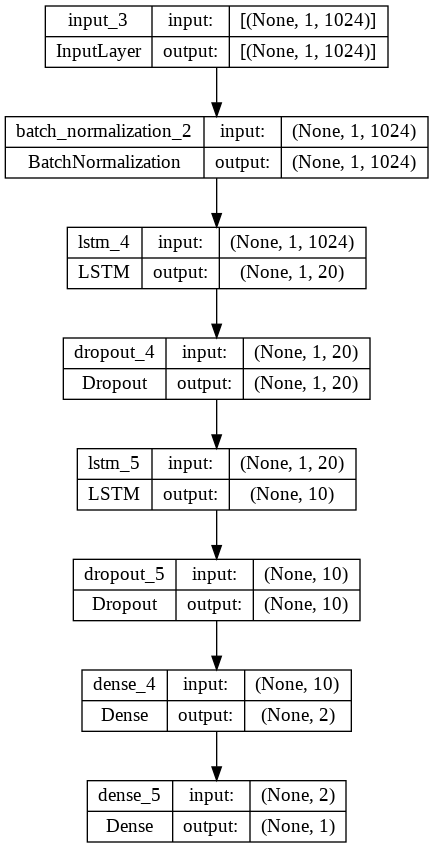

In [37]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True, expand_nested=True)

In [38]:
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 1, 1024)          4096      
 hNormalization)                                                 
                                                                 
 lstm_4 (LSTM)               (None, 1, 20)             83600     
                                                                 
 dropout_4 (Dropout)         (None, 1, 20)             0         
                                                                 
 lstm_5 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 22        
                                                      

In [39]:
tb_lstm = tf.keras.callbacks.TensorBoard(log_dir="logs/LSTM")

In [40]:
model_lstm.compile(optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [41]:
epocas = 10

In [42]:
history_lstm = model_lstm.fit(x = x_train,y = y_train ,epochs=epocas, callbacks=[tb_lstm], batch_size = 32, validation_split = .1)

Epoch 1/10
1387/1387 [==============================] - 12s 6ms/step - loss: 0.4181 - accuracy: 0.1453 - val_loss: 2.0077 - val_accuracy: 1.0000
Epoch 2/10
1387/1387 [==============================] - 8s 6ms/step - loss: 0.3905 - accuracy: 0.1453 - val_loss: 2.0090 - val_accuracy: 1.0000
Epoch 3/10
1387/1387 [==============================] - 8s 6ms/step - loss: 0.3802 - accuracy: 0.1453 - val_loss: 2.1674 - val_accuracy: 1.0000
Epoch 4/10
1387/1387 [==============================] - 8s 6ms/step - loss: 0.3721 - accuracy: 0.1453 - val_loss: 2.1119 - val_accuracy: 1.0000
Epoch 5/10
1387/1387 [==============================] - 8s 6ms/step - loss: 0.3652 - accuracy: 0.1453 - val_loss: 2.2202 - val_accuracy: 1.0000
Epoch 6/10
1387/1387 [==============================] - 8s 6ms/step - loss: 0.3592 - accuracy: 0.1453 - val_loss: 2.2742 - val_accuracy: 1.0000
Epoch 7/10
1387/1387 [==============================] - 9s 7ms/step - loss: 0.3530 - accuracy: 0.1453 - val_loss: 2.2888 - val_accuracy

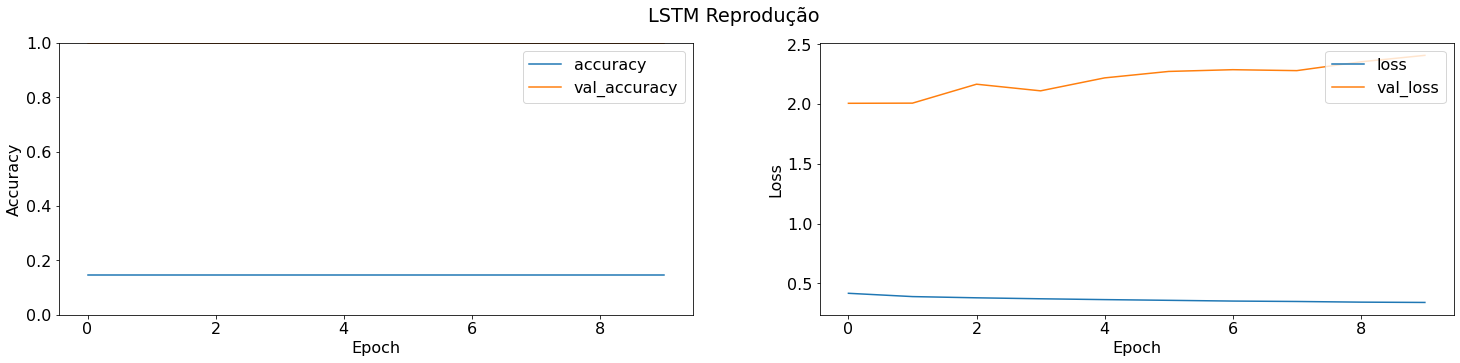

In [43]:
fig,axs = plt.subplots(1,2,figsize=(25,5))
fig.suptitle('LSTM Reprodução')
plt.rcParams['font.size'] = '16'

axs[0].plot(history_lstm.history['accuracy'], label='accuracy')
axs[0].plot(history_lstm.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim([0,1])
axs[0].legend(loc='upper right')

axs[1].plot(history_lstm.history['loss'], label='loss')
axs[1].plot(history_lstm.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

388/388 [==============================] - 2s 2ms/step


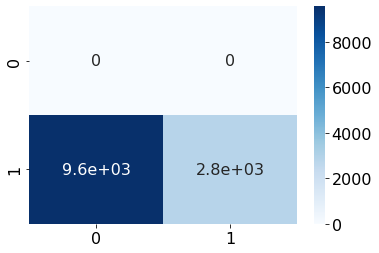

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = model_lstm.predict(x_test)
y_pred = y_pred[:,0]
for idx, pred in enumerate(y_pred):
  y_pred[idx] = 1 if pred>0.5 else 0


cf_matrix = confusion_matrix(y_pred, y_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')